# Machine Learning (COSC 522)
## Project 4

In [1]:
# Import Jupyter Widgets
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display
# Clone the repository if you're in Google Collab
# from google.colab import drive
# drive.mount('/content/drive', force_remount=False)
def mount_and_change_dir(is_collab: bool = False):
    from google.colab import drive
    # Mount Google Drive
    drive.mount('/content/drive', force_remount=False)
    # Set working directory
    project_path = '/content/drive/MyDrive/Projects/UTK/COSC522'
    os.chdir(project_path)
    print(os.listdir(project_path))
       
print("Are you on Google Collab?")
btn = widgets.Button(description="Yes")
btn.on_click(mount_and_change_dir)
display(btn)

Are you on Google Collab?


Button(description='Yes', style=ButtonStyle())

## Initializations

In [37]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_formats = ['png']

import numpy as np
import matplotlib.pyplot as plt
from time import time
from pprint import pprint
import seaborn as sns
from scipy.stats import uniform, gaussian_kde, norm
from typing import *
from tqdm.notebook import tqdm

from custom_libs import ColorizedLogger

sns.set_style('darkgrid')

logger = ColorizedLogger('Project4', 'yellow')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Models

In [38]:
# Located in <project root>/custom_libs/Project4
import custom_libs.Project4.models as p4_models
import custom_libs.Project4.nielsens_model as n_model

### Load Plotting Functions

In [3]:
def plot_results(losses, accuracies, subsample=100):
    losses_ = losses[::subsample]
    losses_ = list(zip(*losses_))    
    loss_names = []    
    loss_values= []

    for loss in losses_:
        loss_name, values = list(zip(*loss))
        loss_names.append(loss_name[0])
        loss_values.append(values)   
    
    accuracies_ = accuracies[::subsample]
    x = np.arange(1, len(accuracies_)+1)

    plt.plot(x, accuracies_, label='accuracies')
    for name, loss in zip(loss_names, loss_values):
        plt.plot(x, loss, label=name)
        
    plt.legend()

### Load the two datasets and Preprocess them

In [39]:
# Located in <project root>/custom_libs/Project4
import custom_libs.Project4.data_loader as dl

In [6]:
# Create a Data Loader
datasets = ['xor', 'mnist']
data_loader = dl.DataLoader(datasets=datasets, data_folder='data')

In [42]:
# Get the two datasets
datasets = data_loader.get_datasets()
xor_data = datasets['xor']
mnist_tr, mnist_te, mnist_val = datasets['mnist']
print("xor_data\n", xor_data)

xor_data
 [[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 0]]


In [41]:
# Normalize and standarize them
# xor
xor_data_norm = data_loader.normalize_(xor_data)[0]
xor_data_stand = data_loader.standarize_(xor_data)[0]
print("xor_data_norm\n", xor_data_norm)
print("xor_data_stand\n", xor_data_stand)
# mnist
mnist_tr_norm, mnist_te_norm, mnist_val_norm = data_loader.normalize_(mnist_tr, 
                                                                      mnist_te,
                                                                      mnist_val)

xor_data_norm
 [[-0.5 -0.5  0. ]
 [-0.5  0.5  1. ]
 [ 0.5 -0.5  1. ]
 [ 0.5  0.5  0. ]]
xor_data_stand
 [[-1. -1.  0.]
 [-1.  1.  1.]
 [ 1. -1.  1.]
 [ 1.  1.  0.]]


In [44]:
# One Hot Encode the target values
# xor
xor_y_one_hot = data_loader.one_hot_encode_last(xor_data)
print("XOR Y one hot encoded\n", xor_y_one_hot)
# Mnist
mnist_tr_y_one_hot = data_loader.one_hot_encode_last(mnist_tr)
mnist_te_y_one_hot = data_loader.one_hot_encode_last(mnist_te)
mnist_val_y_one_hot = data_loader.one_hot_encode_last(mnist_val)

XOR Y one hot encoded
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


## XOR Dataset

### Nielsen's Code

### My Code

In [54]:
dataset, targets = xor_data_stand.copy(), xor_y_one_hot.copy()

n_units = [int(dataset.shape[1]-1), 4, 3, int(dataset[:, -1].max()+1)]
activations = ["sigmoid", "sigmoid", "sigmoid"]
loss_functions = ['mse', 'cross_entropy']
lr = 1
batch_size = 1
max_epochs = 200
shuffle = False
seed = 4
epochs_show_every = 50
batches_show_every = None
# debug = {'top': 3, 'ff': 3, 'bp': 3, 'w': 3}
debug = {'top': 2, 'ff': 0, 'bp': 0, 'w': 0}
mlp = p4_models.MultiLayerPerceptron(units=n_units, activations=activations, 
                                     loss_functions=loss_functions, seed=seed)
# Train
accuracies, losses = mlp.train(train=dataset, batch_size=batch_size, lr=lr, max_epochs=max_epochs,
                               shuffle=shuffle, 
                               epochs_show_every=epochs_show_every, 
                               batches_show_every=batches_show_every, 
                               debug=debug)


2021-10-29 20:21:32 Project4 Models INFO     Units per Layer: [2, 4, 3, 2]
2021-10-29 20:21:32 Project4 Models INFO     Shapes of biases: [(4, 1), (3, 1), (2, 1)]
2021-10-29 20:21:32 Project4 Models INFO     Shapes of weights: [(4, 2), (3, 4), (2, 3)]
2021-10-29 20:21:32 Project4 Models INFO     Epoch: 50
2021-10-29 20:21:32 Project4 Models INFO       mse Loss: 0.13224
2021-10-29 20:21:32 Project4 Models INFO       cross_entropy Loss: 0.45074
2021-10-29 20:21:32 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-29 20:21:32 Project4 Models INFO     Epoch: 100
2021-10-29 20:21:32 Project4 Models INFO       mse Loss: 0.01796
2021-10-29 20:21:32 Project4 Models INFO       cross_entropy Loss: 0.14333
2021-10-29 20:21:32 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-29 20:21:32 Project4 Models INFO     Epoch: 150
2021-10-29 20:21:32 Project4 Models INFO       mse Loss: 0.00718
2021-10-29 20:21:32 Project4 Models INFO       cross_entropy Loss: 0.08838
2

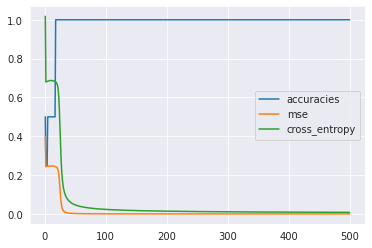

In [39]:
plot_results(accuracies=accuracies, losses=losses, subsample=10)

## Task 2

In [43]:
a = np.array([[1], [0], [7]]).T

b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
print(b)

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [41]:
dataset = mnist_val_stand.copy()

n_units = [int(dataset.shape[1]-1), 512, 512, int(dataset[:, -1].max()+1)]
activations = ["relu", "relu", "softmax"]
loss_functions = ['mse', 'cross_entropy']
lr = 1
batch_size = 15
max_epochs = 50
shuffle = True
seed = 3
epochs_show_every = 1
batches_show_every = 50
debug = {'top': 2, 'ff': 0, 'bp': 0, 'w': 0}
mlp = p4_models.MultiLayerPerceptron(units=n_units, 
                                     activations=activations,
                                     loss_functions=loss_functions,
                                     seed=seed)
accuracies, losses = mlp.train(train=dataset.copy(), shuffle=shuffle, 
                               batch_size=batch_size, lr=lr, 
                               max_epochs=max_epochs, debug=debug, 
                               epochs_show_every=epochs_show_every,
                               batches_show_every=batches_show_every)

2021-10-29 21:57:04 Project4 Models INFO       mse Loss: 28.39640
2021-10-29 21:57:04 Project4 Models INFO       cross_entropy Loss: inf
2021-10-29 21:57:04 Project4 Models INFO       Accuracy on training data: 516 / 5000
2021-10-29 21:57:04 Project4 Models INFO     Epoch: 5
2021-10-29 21:57:05 Project4 Models INFO       Batch: 0
2021-10-29 21:57:09 Project4 Models INFO       mse Loss: 28.39640
2021-10-29 21:57:09 Project4 Models INFO       cross_entropy Loss: inf
2021-10-29 21:57:09 Project4 Models INFO       Accuracy on training data: 516 / 5000
2021-10-29 21:57:14 Project4 Models INFO       Batch: 50


KeyboardInterrupt: ignored

In [ ]:
print(accuracies, losses)

plot_results(losses, accuracies, 1)

In [ ]:
i

In [ ]:
F

## Task 3